# IBM HR Analytics Attrition Factors and Predictions

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

Exploring what insights we can gather about employee attrition rate, and see if we can't build a good prediction model

In [1]:
import time
from operator import itemgetter

import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# Ignore XGB Warning for some depreciation warning
import warnings
warnings.filterwarnings('ignore')

# Set seed
seed=16

# Format floats without scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [2]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,...,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.000,1024.865,2.722,65.891,2.730,2.064,...,2.712,80.000,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.000,602.024,1.093,20.329,0.712,1.107,...,1.081,0.000,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.000,1.000,1.000,30.000,1.000,1.000,...,1.000,80.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.000,491.250,2.000,48.000,2.000,1.000,...,2.000,80.000,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.000,1020.500,3.000,66.000,3.000,2.000,...,3.000,80.000,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.000,1555.750,4.000,83.750,3.000,3.000,...,4.000,80.000,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.000,2068.000,4.000,100.000,4.000,5.000,...,4.000,80.000,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


In [3]:
print(data.columns.values)
print("Columns: {0}".format(len(data.columns.values)))

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']
Columns: 35


In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Process and Add Some Useful Features

In [5]:
# Useful Features
data['StandardWeeklyHours'] = data.StandardHours / 2  # Add Weekly hours along with biweekly hours
data['Salary'] = data.DailyRate * 5 * 52  # Their Yearly Salary (Assumes 5 days a week)
data['AgeBin'] = pd.cut(data.Age, [x for x in range(17, 70, 2)])
data['DailyRateQBin'] = pd.qcut(data.DailyRate, [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
data['SalaryQBin'] = pd.qcut(data.Salary, [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
data['DistanceFromHomeBin'] = pd.cut(data.DistanceFromHome, [x for x in range(0, 33, 3)])
data['YearsAtCompanyBin'] = pd.cut(data.YearsAtCompany, [x for x in range(0, 44, 2)], right=False)
data['PercentSalaryHikeQBin'] = pd.qcut(data.PercentSalaryHike, [0, .2, .4, .6, .8, 1])
data['TotalWorkingYearsBin'] = pd.cut(data.TotalWorkingYears, [x for x in range(0, 44, 2)], right=False)

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsWithCurrManager,StandardWeeklyHours,Salary,AgeBin,DailyRateQBin,SalaryQBin,DistanceFromHomeBin,YearsAtCompanyBin,PercentSalaryHikeQBin,TotalWorkingYearsBin
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,5,40.000,286520,"(39, 41]","(1094.6, 1224.2]","(284596.0, 318292.0]","(0, 3]","[6, 8)","(10.999, 12.0]","[8, 10)"
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,7,40.000,72540,"(47, 49]","(242.8, 391.8]","(63128.0, 101868.0]","(6, 9]","[10, 12)","(19.0, 25.0]","[10, 12)"
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,40.000,356980,"(35, 37]","(1356.0, 1499.0]","(352560.0, 389740.0]","(0, 3]","[0, 2)","(13.0, 15.0]","[6, 8)"
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,40.000,361920,"(31, 33]","(1356.0, 1499.0]","(352560.0, 389740.0]","(0, 3]","[8, 10)","(10.999, 12.0]","[8, 10)"
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,40.000,153660,"(25, 27]","(530.7, 656.2]","(137982.0, 170612.0]","(0, 3]","[2, 4)","(10.999, 12.0]","[6, 8)"


## EDA

#### Attrition - Bivariate with other features

In [6]:
print("Yes: {0}".format(len(data.Attrition[data.Attrition == 'Yes'].values)))
print("No: {0}".format(len(data.Attrition[data.Attrition == 'No'].values)))
mean_attrition_rate = len(data.Attrition[data.Attrition == 'Yes'].values) / len(data.Attrition.values)
normal_buffer = .05
print("Attrition Rate: {0:.4f}".format(mean_attrition_rate))

Yes: 237
No: 1233
Attrition Rate: 0.1612


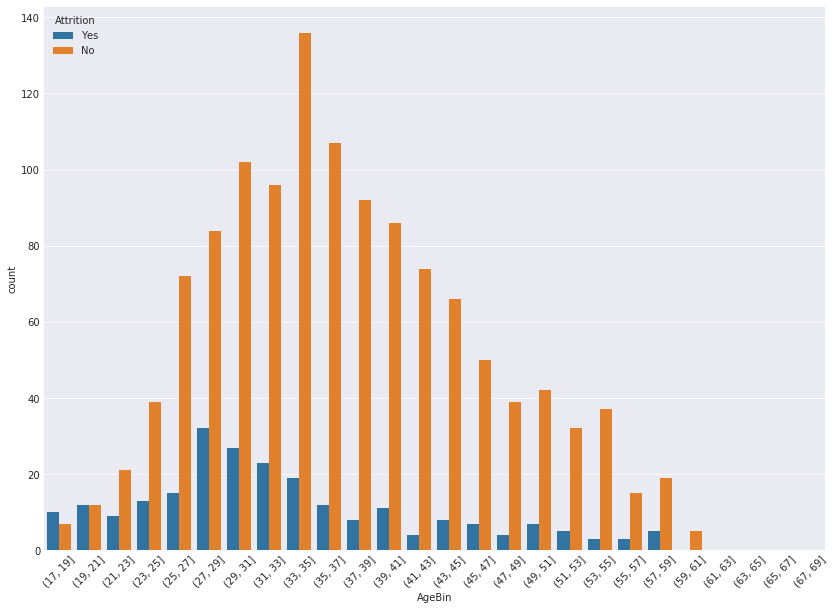

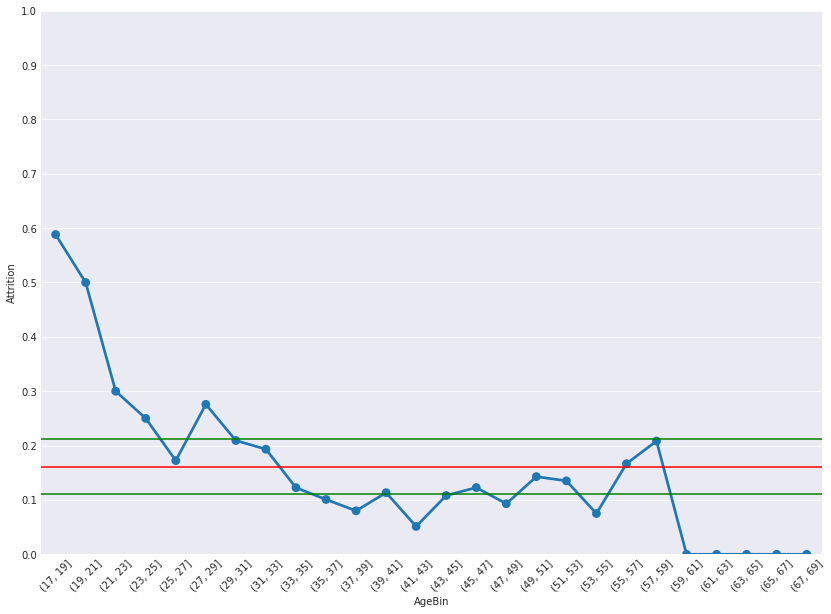

18 - 33 Mean Attrition rate: 0.31
34 - 49 Mean Attrition rate: 0.10


In [7]:
# Age vs Attrition

age_attr_rate = data[data.Attrition == 'Yes'].groupby(['AgeBin'])['Attrition'].count() / data.groupby(['AgeBin'])['Attrition'].count()
age_attr_rate = age_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='AgeBin', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=age_attr_rate.index, y=age_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("18 - 33 Mean Attrition rate: {0:.2f}".format(age_attr_rate[0:8].mean()))
print("34 - 49 Mean Attrition rate: {0:.2f}".format(age_attr_rate[8:16].mean()))

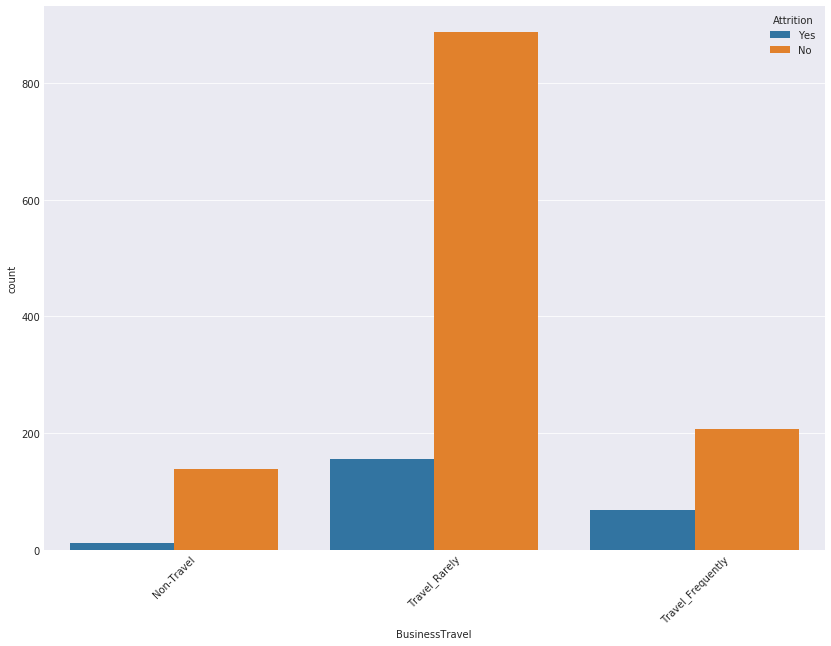

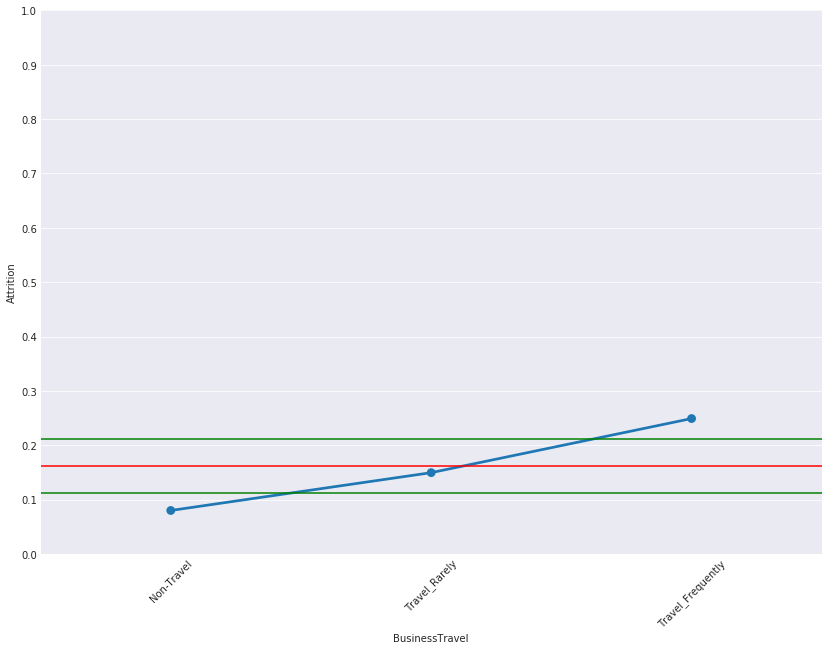

Travel Frequently Attrition rate: 0.25
Non-Travel Attrition rate: 0.08


In [8]:
# Business Travel vs Attrition

bt_attr_rate = data[data.Attrition == 'Yes'].groupby(['BusinessTravel'])['Attrition'].count() / data.groupby(['BusinessTravel'])['Attrition'].count()
bt_attr_rate = bt_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='BusinessTravel', hue='Attrition', data=data, order=bt_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=bt_attr_rate.index, y=bt_attr_rate, order=bt_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("Travel Frequently Attrition rate: {0:.2f}".format(bt_attr_rate[1]))
print("Non-Travel Attrition rate: {0:.2f}".format(bt_attr_rate[0]))

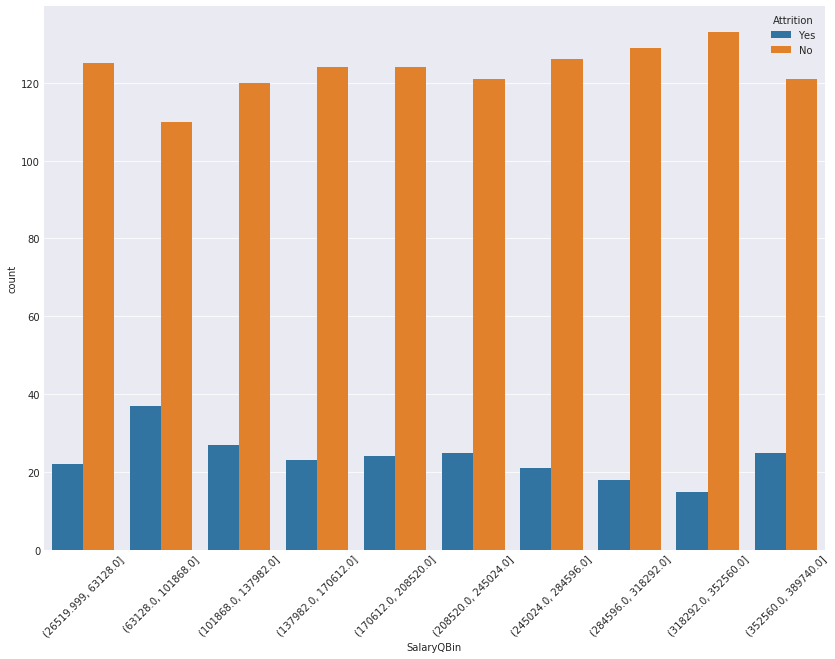

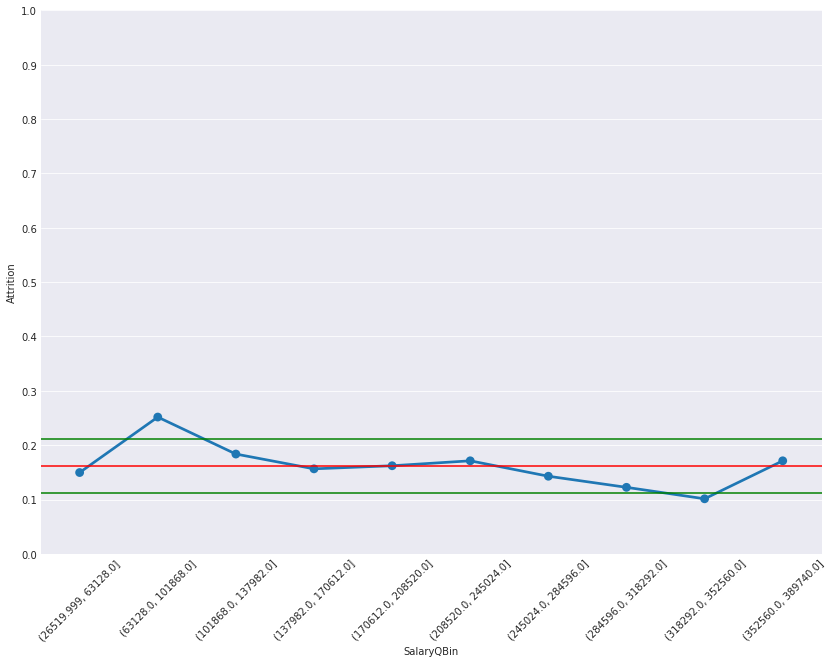

10 - 20 Percentile ($63,128 - $101,868) Attrition rate: 0.25


In [9]:
# Salary (By 10% percentile ranges) vs. Attrition

sal_attr_rate = data[data.Attrition == 'Yes'].groupby(['SalaryQBin'])['Attrition'].count() / data.groupby(['SalaryQBin'])['Attrition'].count()
sal_attr_rate = sal_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='SalaryQBin', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=sal_attr_rate.index, y=sal_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("10 - 20 Percentile ($63,128 - $101,868) Attrition rate: {0:.2f}".format(sal_attr_rate[1]))

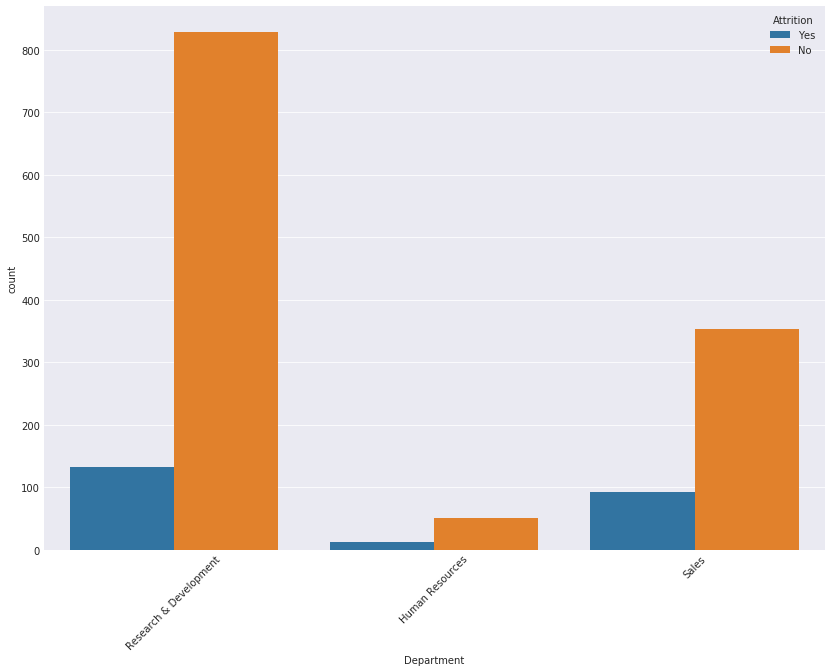

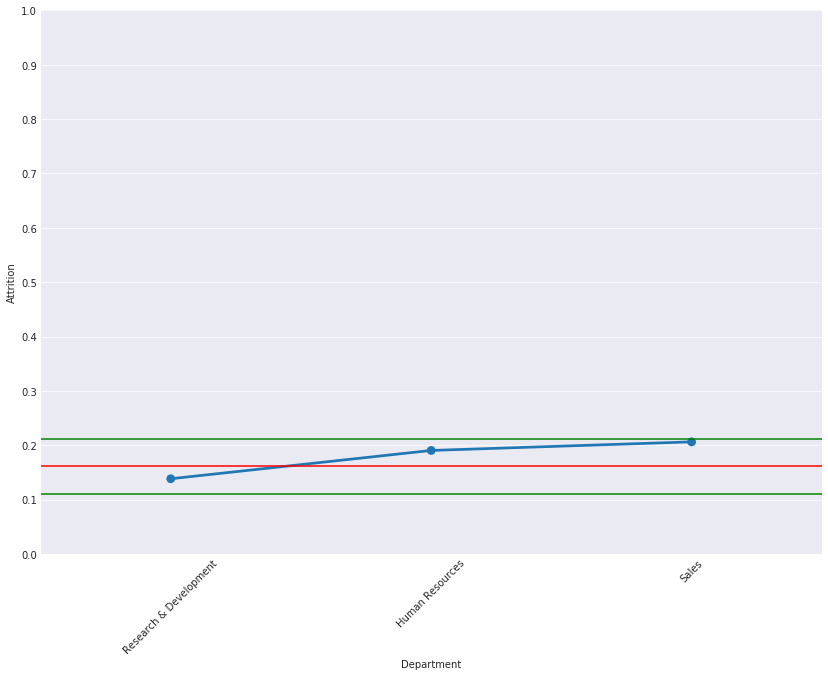

In [10]:
# Department vs Attrition

dept_attr_rate = data[data.Attrition == 'Yes'].groupby(['Department'])['Attrition'].count() / data.groupby(['Department'])['Attrition'].count()
dept_attr_rate = dept_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='Department', hue='Attrition', data=data, order=dept_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=dept_attr_rate.index, y=dept_attr_rate, order=dept_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

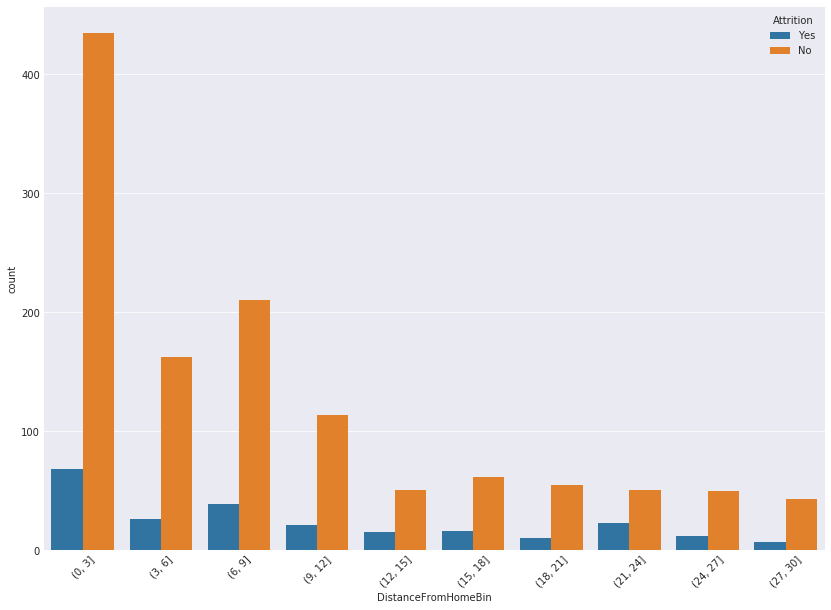

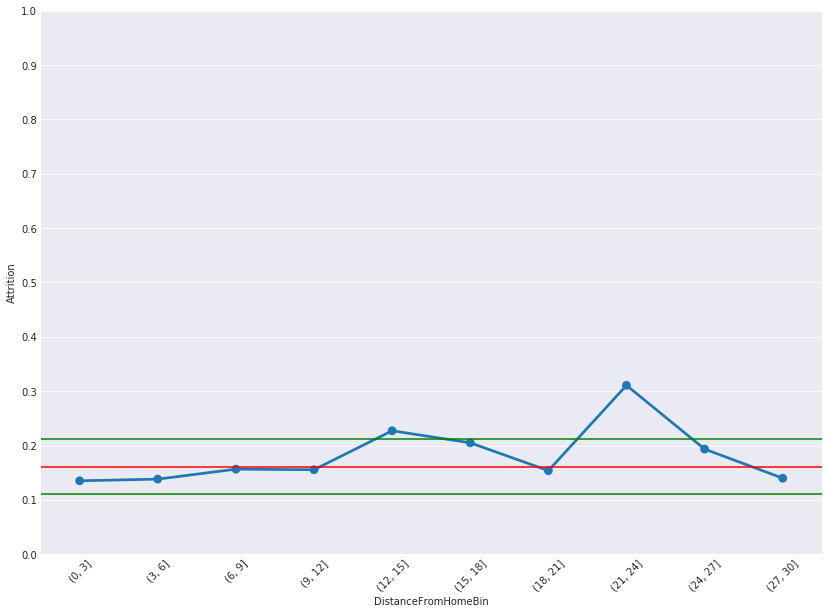

In [11]:
# Distance From Home vs Attrition

dist_attr_rate = data[data.Attrition == 'Yes'].groupby(['DistanceFromHomeBin'])['Attrition'].count() / data.groupby(['DistanceFromHomeBin'])['Attrition'].count()
dist_attr_rate = dist_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='DistanceFromHomeBin', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=dist_attr_rate.index, y=dist_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

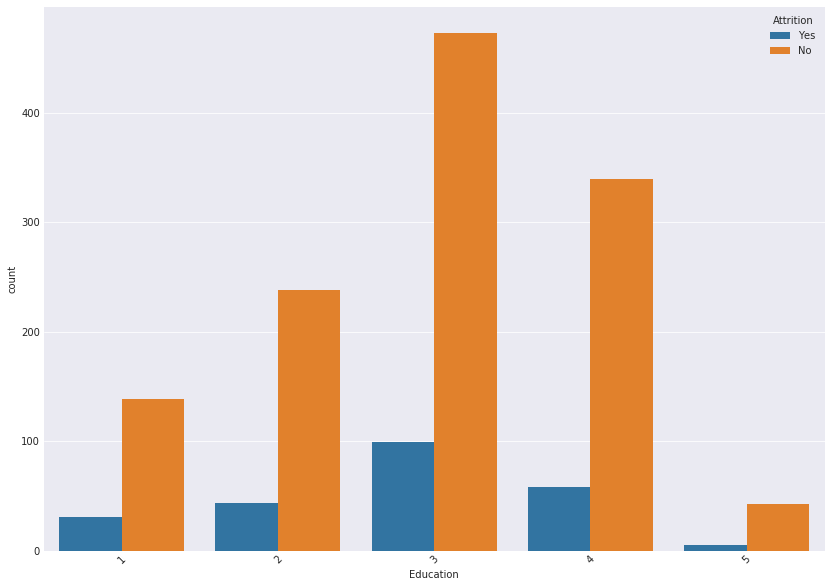

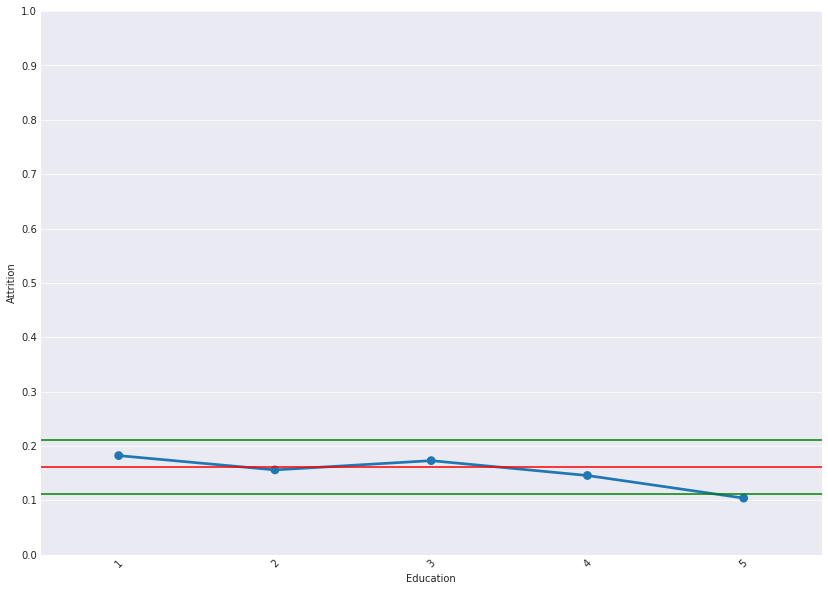

In [12]:
# Education vs. Attrition

edu_attr_rate = data[data.Attrition == 'Yes'].groupby(['Education'])['Attrition'].count() / data.groupby(['Education'])['Attrition'].count()
edu_attr_rate = edu_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='Education', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=edu_attr_rate.index, y=edu_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

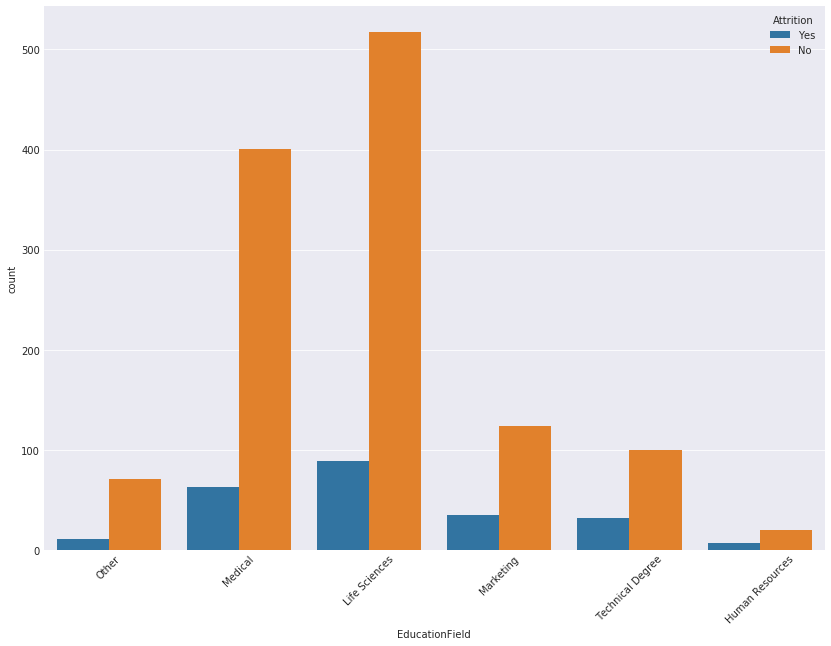

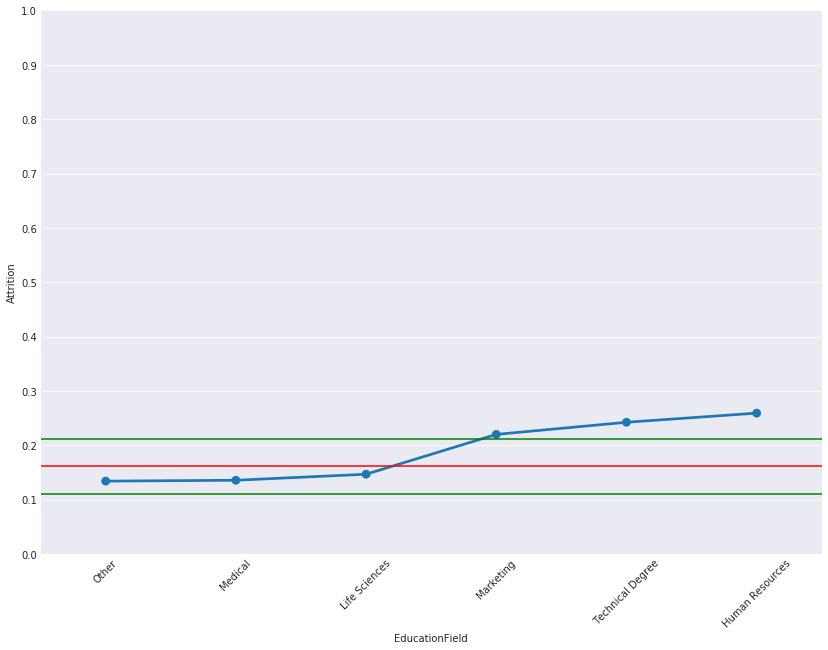

Marketing Attrition rate: 0.22
Technical Degree Attrition rate: 0.24
Human Resources Attrition rate: 0.26


In [13]:
# Education Field vs. Attrition

eduf_attr_rate = data[data.Attrition == 'Yes'].groupby(['EducationField'])['Attrition'].count() / data.groupby(['EducationField'])['Attrition'].count()
eduf_attr_rate = eduf_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='EducationField', hue='Attrition', data=data, order=eduf_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=eduf_attr_rate.index, y=eduf_attr_rate, order=eduf_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("Marketing Attrition rate: {0:.2f}".format(eduf_attr_rate[2]))
print("Technical Degree Attrition rate: {0:.2f}".format(eduf_attr_rate[5]))
print("Human Resources Attrition rate: {0:.2f}".format(eduf_attr_rate[0]))

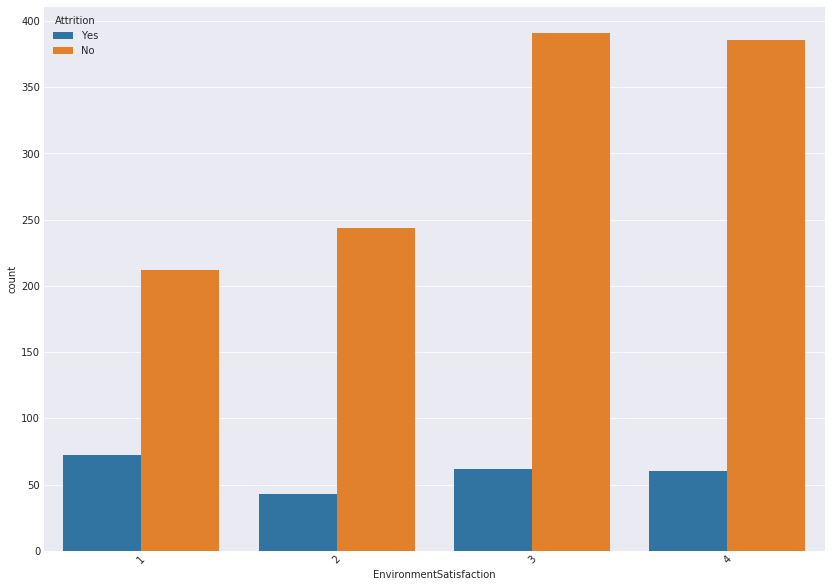

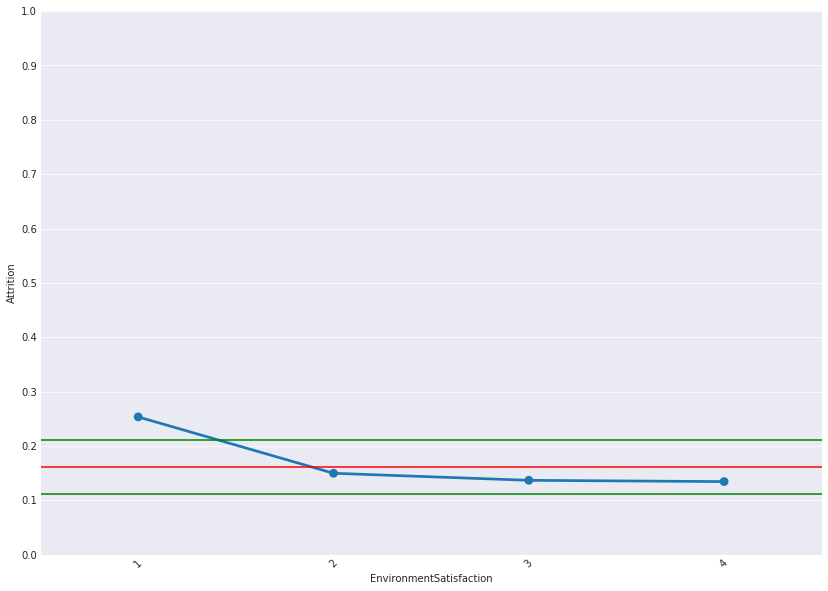

1 'low' Attrition rate: 0.25


In [14]:
# EnvironmentSatisfaction vs. Attrition

es_attr_rate = data[data.Attrition == 'Yes'].groupby(['EnvironmentSatisfaction'])['Attrition'].count() / data.groupby(['EnvironmentSatisfaction'])['Attrition'].count()
es_attr_rate = es_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=es_attr_rate.index, y=es_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("1 'low' Attrition rate: {0:.2f}".format(es_attr_rate[1]))

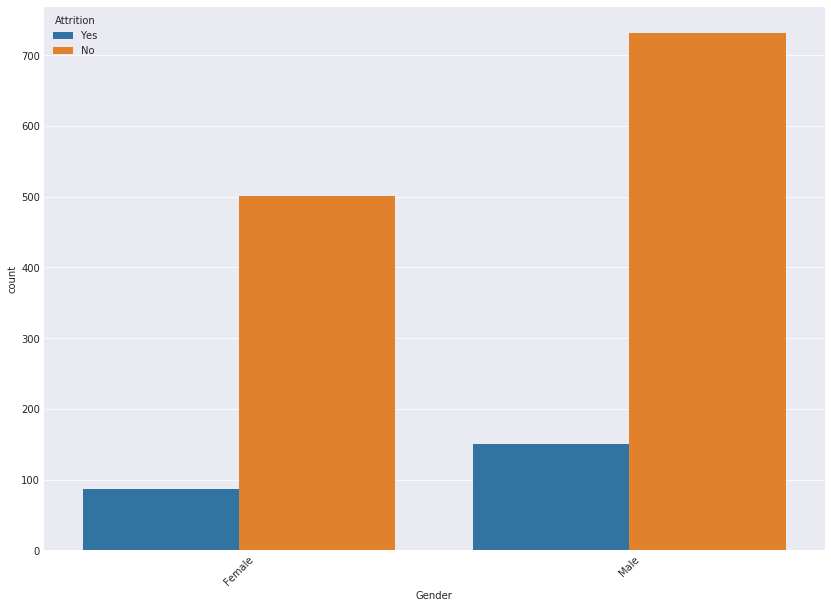

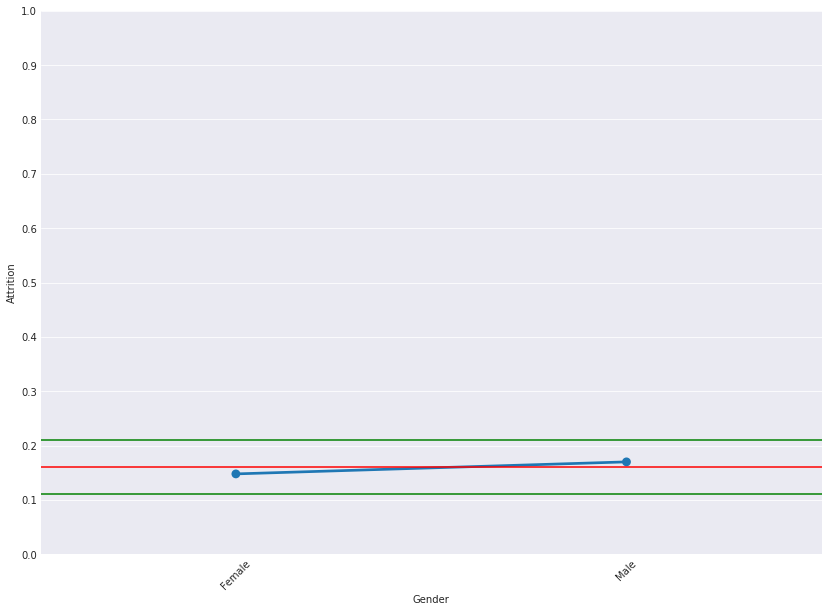

In [15]:
# Gender vs Attrition

gen_attr_rate = data[data.Attrition == 'Yes'].groupby(['Gender'])['Attrition'].count() / data.groupby(['Gender'])['Attrition'].count()
gen_attr_rate = gen_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='Gender', hue='Attrition', data=data, order=gen_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=gen_attr_rate.index, y=gen_attr_rate, order=gen_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

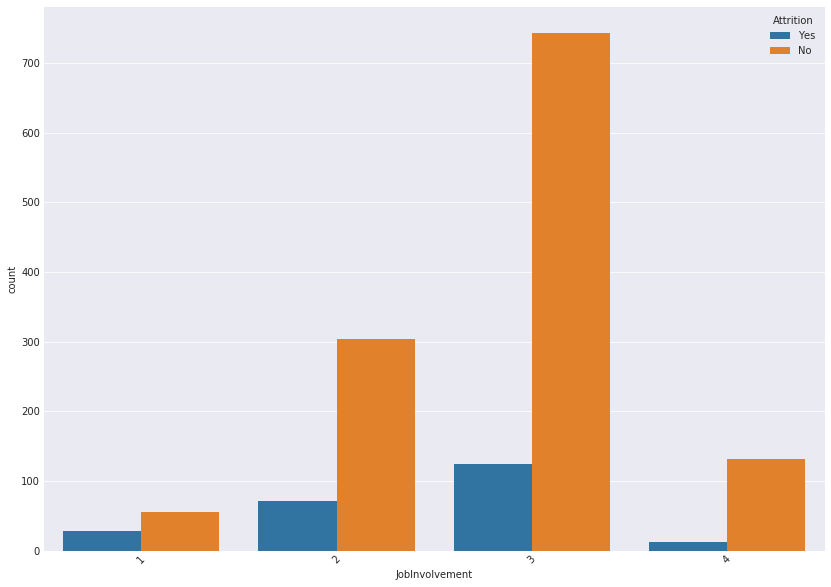

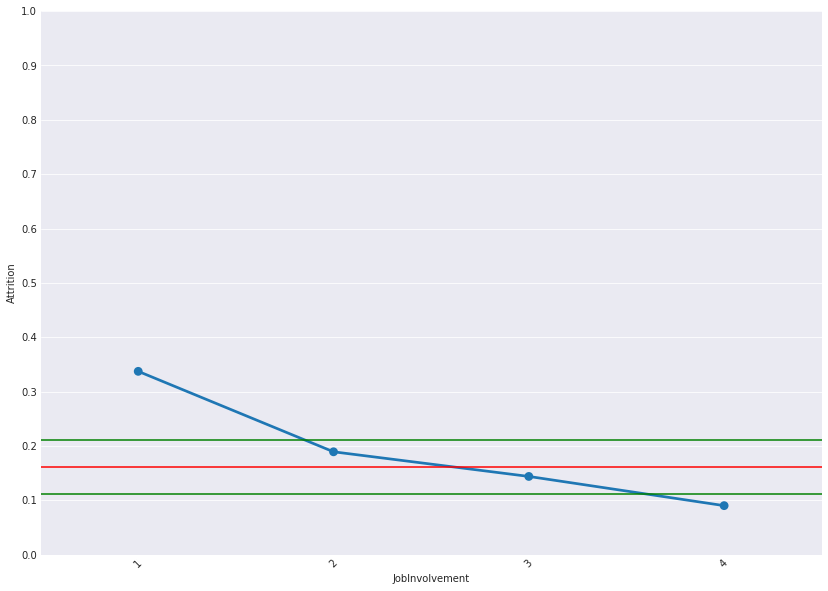

1 'low' Attrition rate: 0.34
4 'Very High' Attrition rate: 0.09


In [16]:
# Job Involvement vs. Attrition

ji_attr_rate = data[data.Attrition == 'Yes'].groupby(['JobInvolvement'])['Attrition'].count() / data.groupby(['JobInvolvement'])['Attrition'].count()
edu_attr_rate = edu_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='JobInvolvement', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=ji_attr_rate.index, y=ji_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("1 'low' Attrition rate: {0:.2f}".format(ji_attr_rate[1]))
print("4 'Very High' Attrition rate: {0:.2f}".format(ji_attr_rate[4]))

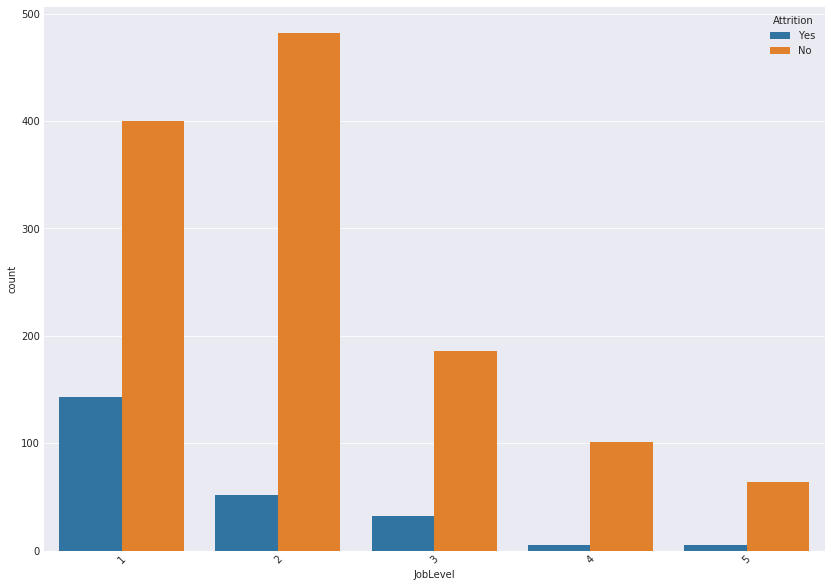

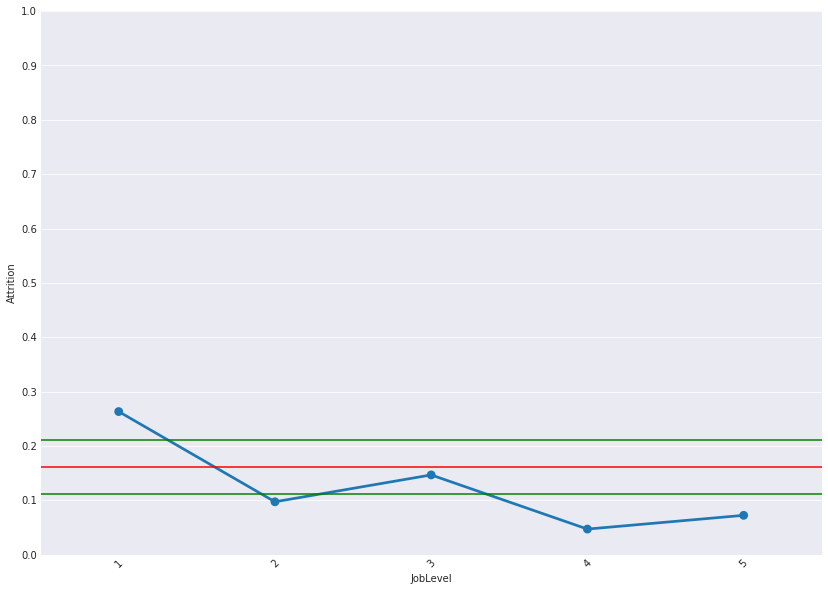

1 Attrition rate: 0.26
4 Attrition rate: 0.05
5 Attrition rate: 0.07


In [17]:
# Job Level vs. Attrition

jl_attr_rate = data[data.Attrition == 'Yes'].groupby(['JobLevel'])['Attrition'].count() / data.groupby(['JobLevel'])['Attrition'].count()
jl_attr_rate = jl_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='JobLevel', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=jl_attr_rate.index, y=jl_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("1 Attrition rate: {0:.2f}".format(jl_attr_rate[1]))
print("4 Attrition rate: {0:.2f}".format(jl_attr_rate[4]))
print("5 Attrition rate: {0:.2f}".format(jl_attr_rate[5]))

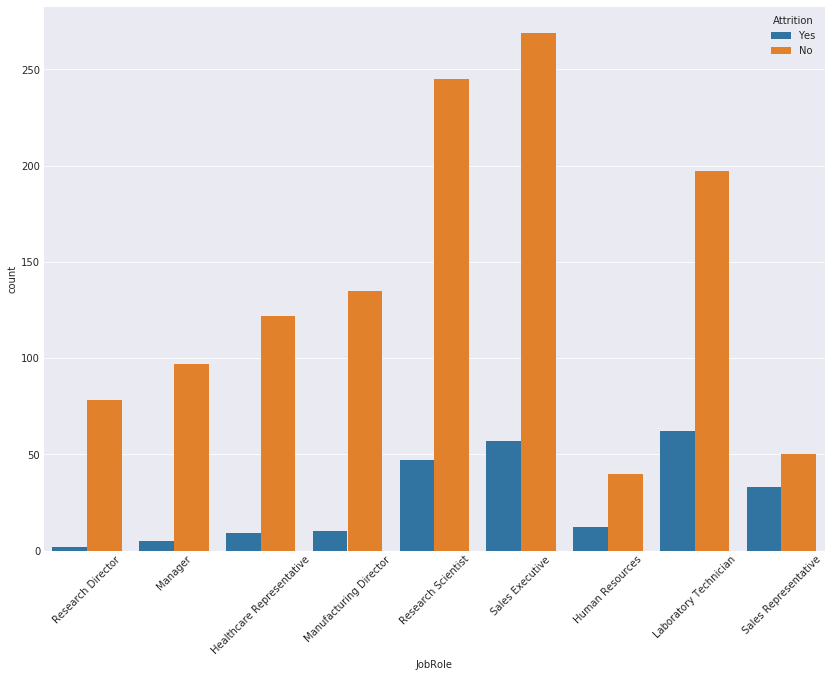

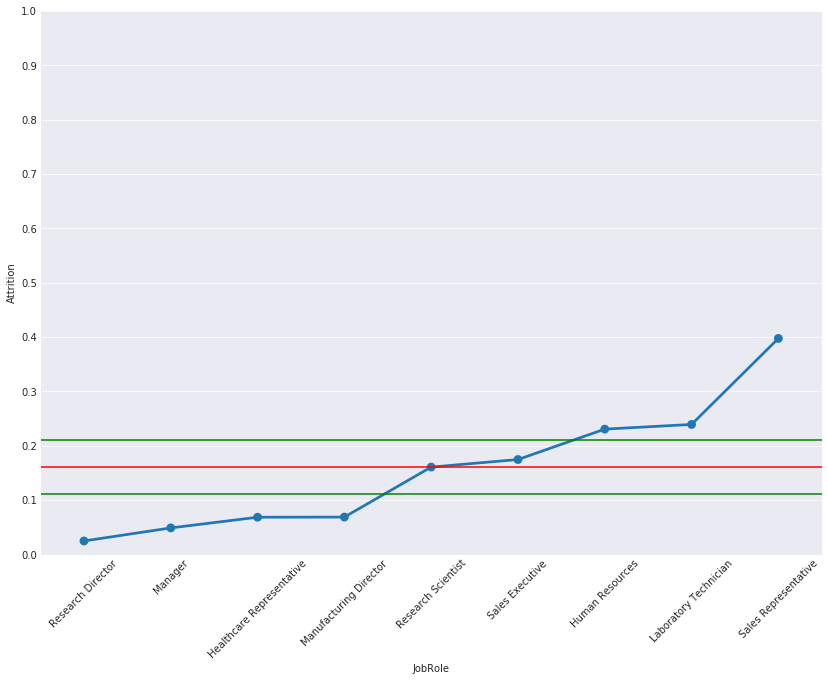

Research Director Attrition rate: 0.03
Manager Attrition rate: 0.05
Healthcare Representative Attrition rate: 0.07
Manufacturing Director Attrition rate: 0.07
Human Resources Attrition rate: 0.23
Laboratory Technician Representative Attrition rate: 0.24
Sales Representative Director Attrition rate: 0.40


In [18]:
# Job Role vs Attrition

jr_attr_rate = data[data.Attrition == 'Yes'].groupby(['JobRole'])['Attrition'].count() / data.groupby(['JobRole'])['Attrition'].count()
jr_attr_rate = jr_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='JobRole', hue='Attrition', data=data, order=jr_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=jr_attr_rate.index, y=jr_attr_rate, order=jr_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("Research Director Attrition rate: {0:.2f}".format(jr_attr_rate[5]))
print("Manager Attrition rate: {0:.2f}".format(jr_attr_rate[3]))
print("Healthcare Representative Attrition rate: {0:.2f}".format(jr_attr_rate[0]))
print("Manufacturing Director Attrition rate: {0:.2f}".format(jr_attr_rate[4]))
print("Human Resources Attrition rate: {0:.2f}".format(jr_attr_rate[1]))
print("Laboratory Technician Representative Attrition rate: {0:.2f}".format(jr_attr_rate[2]))
print("Sales Representative Director Attrition rate: {0:.2f}".format(jr_attr_rate[8]))

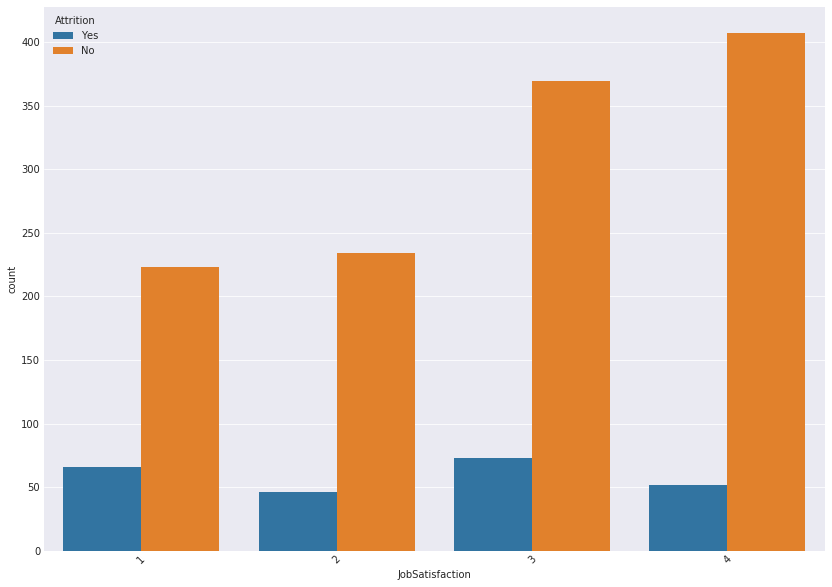

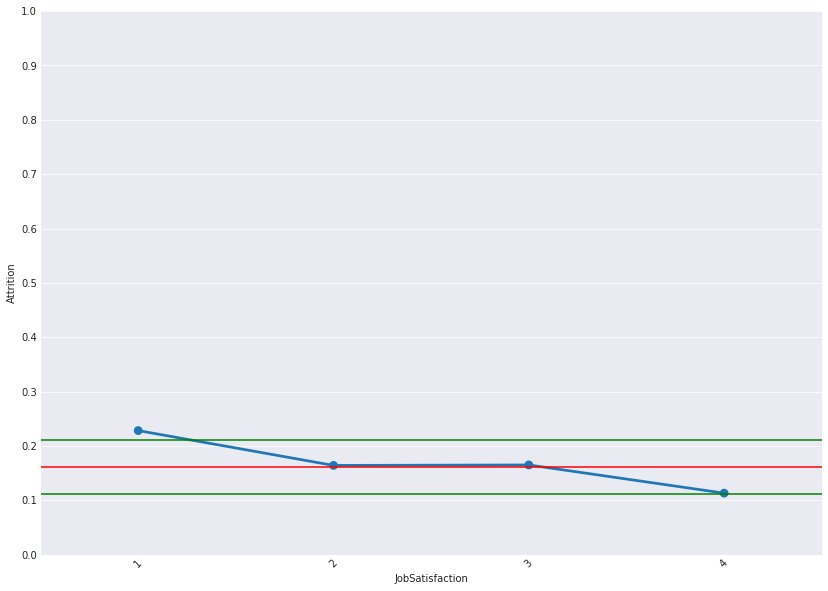

1 'Low' Attrition rate: 0.26


In [19]:
# Job Satisfaction vs. Attrition

js_attr_rate = data[data.Attrition == 'Yes'].groupby(['JobSatisfaction'])['Attrition'].count() / data.groupby(['JobSatisfaction'])['Attrition'].count()
js_attr_rate = js_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='JobSatisfaction', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=js_attr_rate.index, y=js_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("1 'Low' Attrition rate: {0:.2f}".format(jl_attr_rate[1]))

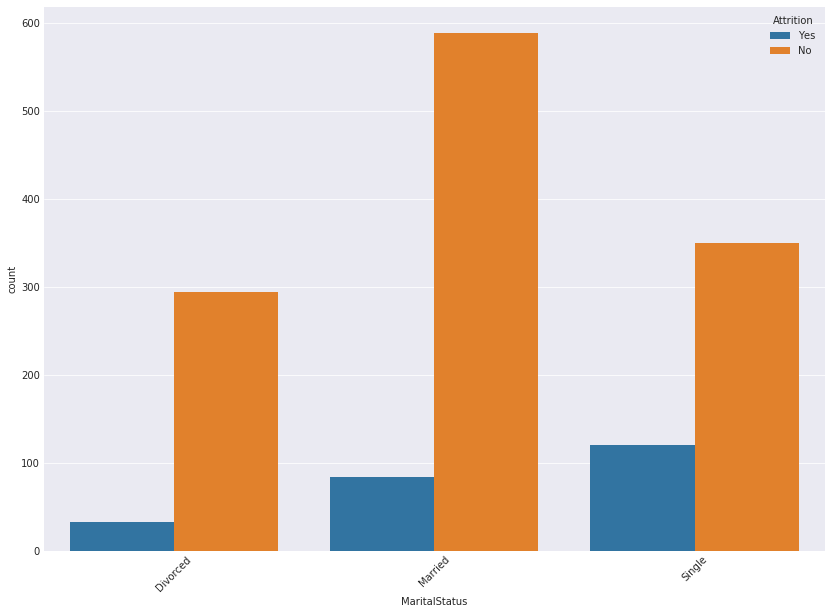

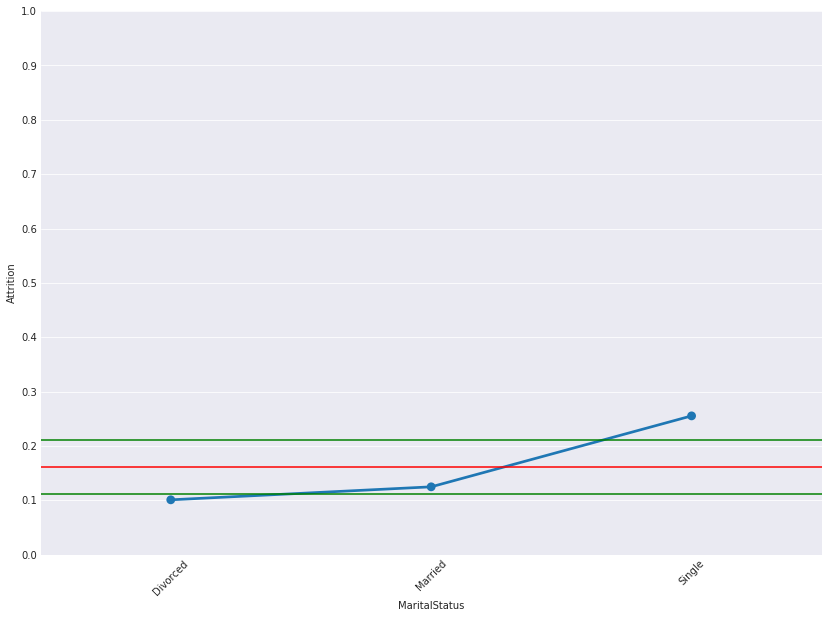

Single Attrition rate: 0.26


In [20]:
# MaritalStatus vs Attrition

ms_attr_rate = data[data.Attrition == 'Yes'].groupby(['MaritalStatus'])['Attrition'].count() / data.groupby(['MaritalStatus'])['Attrition'].count()
ms_attr_rate = ms_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='MaritalStatus', hue='Attrition', data=data, order=ms_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=ms_attr_rate.index, y=ms_attr_rate, order=ms_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("Single Attrition rate: {0:.2f}".format(ms_attr_rate[2]))

... other columns. Add in future

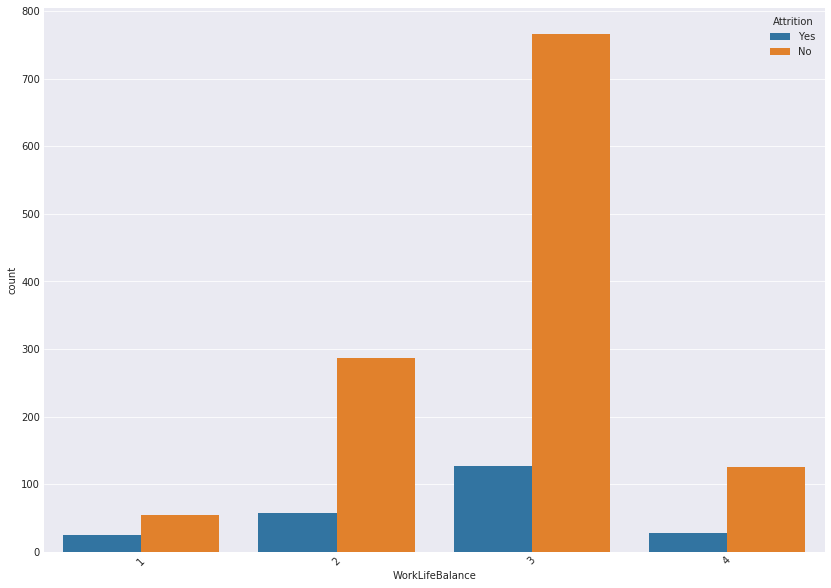

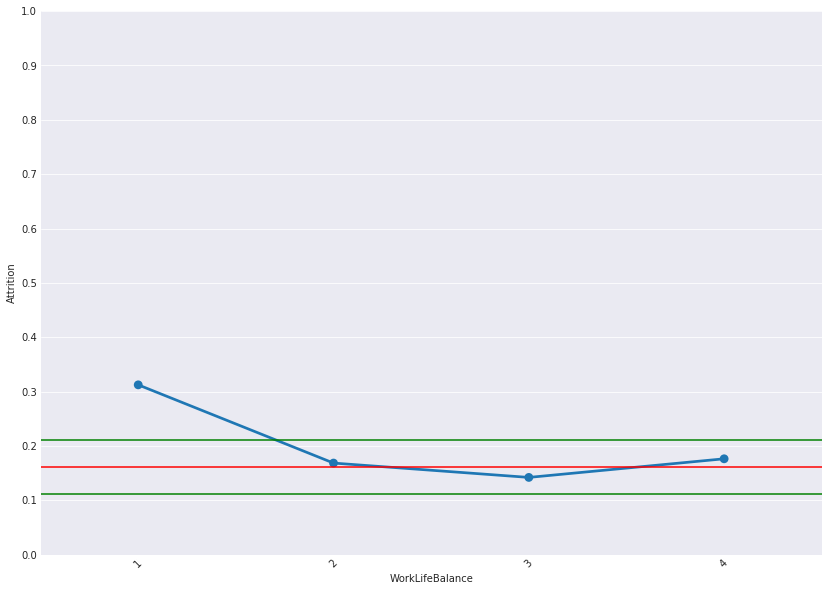

1 Attrition rate: 0.31


In [21]:
# Work Life Balance vs. Attrition

wlb_attr_rate = data[data.Attrition == 'Yes'].groupby(['WorkLifeBalance'])['Attrition'].count() / data.groupby(['WorkLifeBalance'])['Attrition'].count()
wlb_attr_rate = wlb_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=wlb_attr_rate.index, y=wlb_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("1 Attrition rate: {0:.2f}".format(wlb_attr_rate[1]))

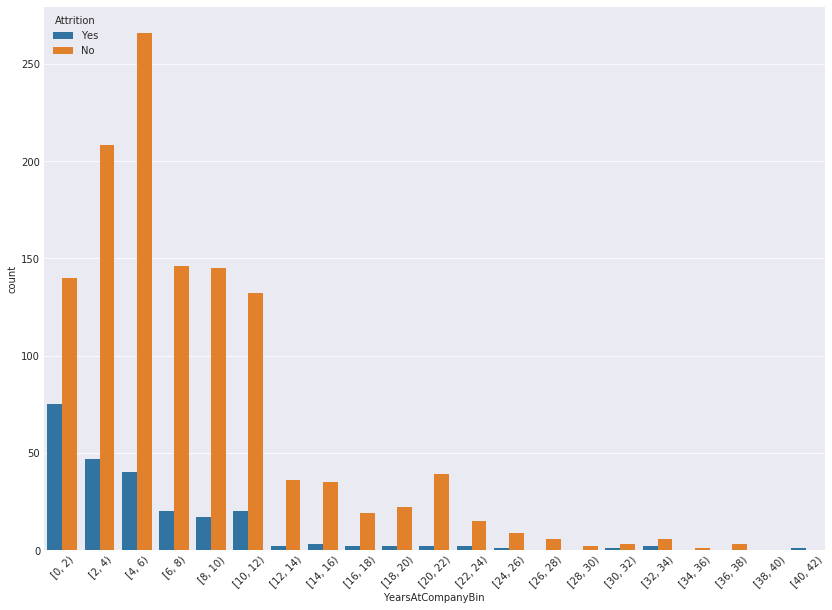

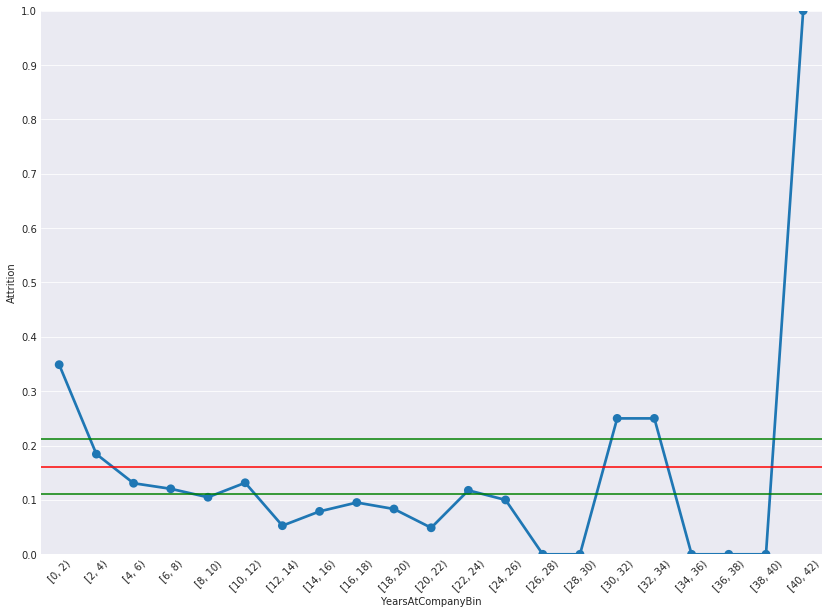

0 - 2 Attrition rate: 0.35
10 - 21 Mean Attrition rate: 0.08


In [22]:
# Years At Company vs. Attrition

yac_attr_rate = data[data.Attrition == 'Yes'].groupby(['YearsAtCompanyBin'])['Attrition'].count() / data.groupby(['YearsAtCompanyBin'])['Attrition'].count()
yac_attr_rate = yac_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='YearsAtCompanyBin', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=yac_attr_rate.index, y=yac_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("0 - 2 Attrition rate: {0:.2f}".format(yac_attr_rate[0]))
print("10 - 21 Mean Attrition rate: {0:.2f}".format(yac_attr_rate[5:11].mean()))

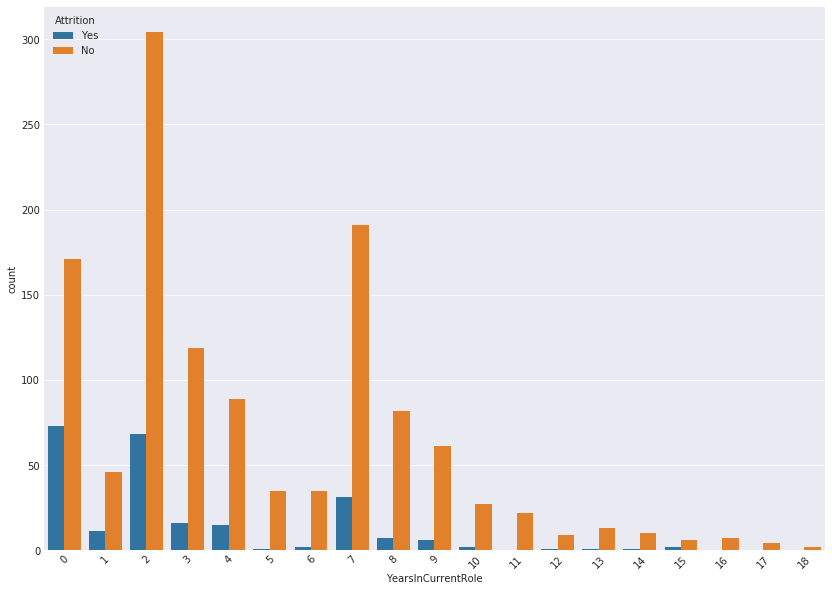

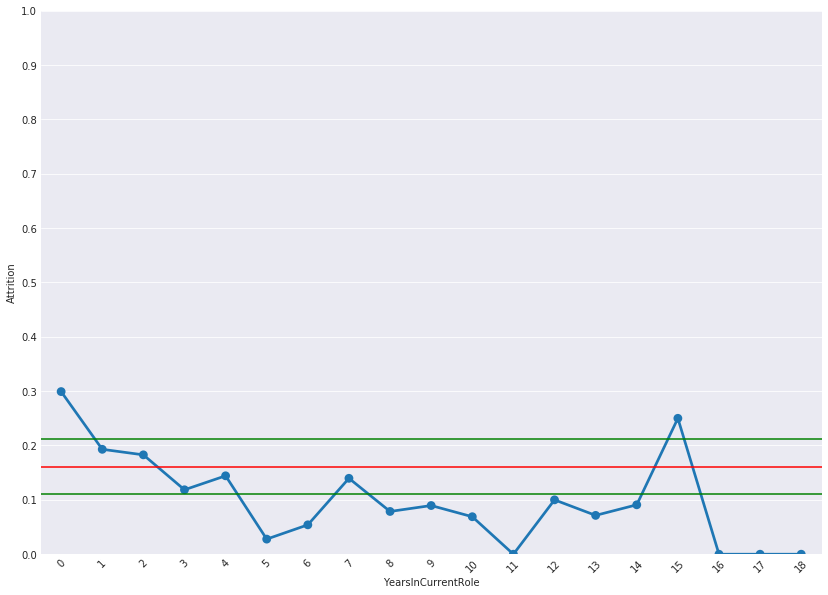

Under A Year (0) Attrition rate: 0.30
5 - 14 Years Means Attrition rate: 0.07


In [23]:
# Years In Current Role vs. Attrition

yicr_attr_rate = data[data.Attrition == 'Yes'].groupby(['YearsInCurrentRole'])['Attrition'].count() / data.groupby(['YearsInCurrentRole'])['Attrition'].count()
yicr_attr_rate = yicr_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=yicr_attr_rate.index, y=yicr_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("Under A Year (0) Attrition rate: {0:.2f}".format(yicr_attr_rate[0]))
print("5 - 14 Years Means Attrition rate: {0:.2f}".format(yicr_attr_rate[5:15].mean()))

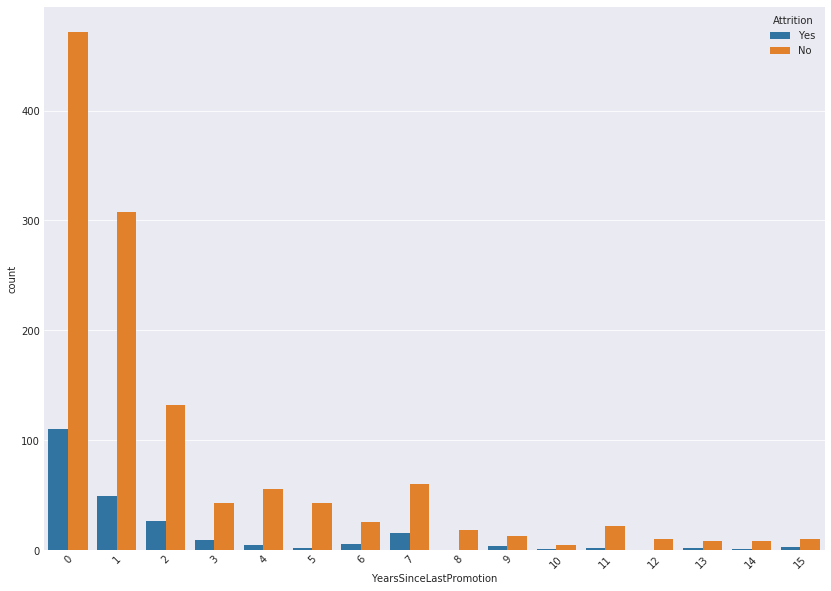

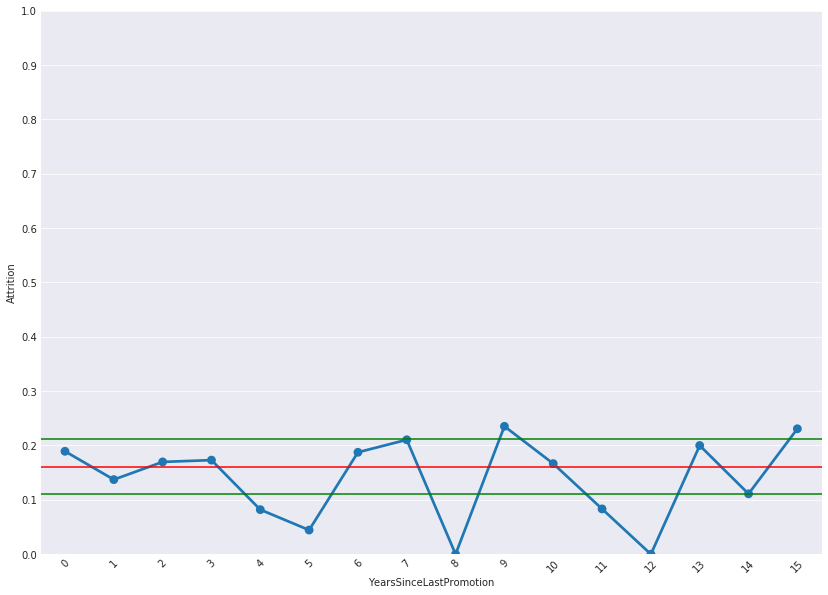

In [24]:
# Years Since Last Promotion vs. Attrition

yslr_attr_rate = data[data.Attrition == 'Yes'].groupby(['YearsSinceLastPromotion'])['Attrition'].count() / data.groupby(['YearsSinceLastPromotion'])['Attrition'].count()
yslr_attr_rate = yslr_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=yslr_attr_rate.index, y=yslr_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Good Attrition Signals:
- Age
  - 34 - 49: 0.10
- Business Travel
  - Non-Travel: 0.08
- Job Involvment
  - 4 'Very High: 0.09
- Job Level
  - 4: 0.05
  - 5: 0.07
- Job Role
  - Research Director: 0.03
  - Manager: 0.05
  - Healthcare Representative: 0.07
  - Manufacturing Director: 0.07
- Years At Company
  - 10 - 21: 0.07
- Years In Current Role
  - 5 - 14: 0.07

Bad Attrition Signals:
- Age
  - 18 - 33: 0.31
- Business Travel
  - Travel Frequently: 0.25
- Salary
  - 10 - 20 Percentile (63,128 - 101,868): 0.25
- Education Field
  - Marketing: 0.22
  - Technical Degree: 0.24
  - Human Resources: 0.26
- EnvironmentSatisfaction
  - 1 'Low': 0.25
- Job Involvement
  - 1 'Low': 0.34
- Job Level
  - 1: 0.26
- Job Role
  - Human Resources: 0.23
  - Laboratory Technician: 0.24
  - Sales Representative: 0.40
- Job Satisfaction
  - 1 'Low': 0.26
- Marital Status
  - Single: 0.26
- Work Life Balance
  - 1 'Bad': 0.31
- Years At Company
  - 0 - 2: 0.29
- Years In Current Role
  - Under A Year (0): 0.30

## Convert Features For Modeling

In [25]:
"""
Reasons For Drop
Age = Binned - AgeBin
DailyRate = Binned - DailyRateQBin
DistanceFromHome = DistanceFromHomeBin
EmployeeCount = Variable that just counts employees
EmployeeNumber = Unique ID for employee
HourlyRate = Binned - DailyRateQBin
MonthlyIncome = Binned - SalaryQBin
MonthlyRate = Binned - SalaryQBin
Over18 = Only Yes, No Predictive Value
StandardHours = All were 80, No Predictive Value
StandardWeeklyHours = All were 40, No Predictive Value
YearsAtCompany = Binned - YearsAtCompanyBin
PercentSalaryHike = Binned - PercentSalaryHikeQBin
TotalWorkingYears = Binned - TotalWorkingYearsBin
Salary = Binned - SalaryQBin
"""
data = data.drop(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'Over18', 'StandardHours', 'StandardWeeklyHours', 'YearsAtCompany', 'PercentSalaryHike', 'TotalWorkingYears', 'Salary'], axis=1)

In [26]:
# Convert Object to Categorical Encoded Variable Codes

data.Attrition = data.Attrition.astype('category')
data.BusinessTravel = data.BusinessTravel.astype('category')
data.Department = data.Department.astype('category')
data.Education = data.Education.astype('category')
data.EducationField = data.EducationField.astype('category')
data.EnvironmentSatisfaction = data.EnvironmentSatisfaction.astype('category')
data.Gender = data.Gender.astype('category')
data.JobInvolvement = data.JobInvolvement.astype('category')
data.JobLevel = data.JobLevel.astype('category')
data.JobRole = data.JobRole.astype('category')
data.JobSatisfaction = data.JobSatisfaction.astype('category')
data.MaritalStatus = data.MaritalStatus.astype('category')
# NumCompaniesWorked kept as Int64
data.OverTime = data.OverTime.astype('category')
data.PerformanceRating = data.PerformanceRating.astype('category')
data.RelationshipSatisfaction = data.RelationshipSatisfaction.astype('category')
data.StockOptionLevel = data.StockOptionLevel.astype('category')
# TrainingTimesLastYear kept as Int64
data.WorkLifeBalance = data.WorkLifeBalance.astype('category')
# YearsInCurrentRole kept as Int64
# YearsSinceLastPromotion kept as Int64
# YearsWithCurrManager kept as Int64

data.dtypes

Attrition                   category
BusinessTravel              category
Department                  category
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
NumCompaniesWorked             int64
OverTime                    category
PerformanceRating           category
RelationshipSatisfaction    category
StockOptionLevel            category
TrainingTimesLastYear          int64
WorkLifeBalance             category
YearsInCurrentRole             int64
YearsSinceLastPromotion        int64
YearsWithCurrManager           int64
AgeBin                      category
DailyRateQBin               category
SalaryQBin                  category
DistanceFromHomeBin         category
YearsAtCompanyBin           category
P

In [27]:
data.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeBin,DailyRateQBin,SalaryQBin,DistanceFromHomeBin,YearsAtCompanyBin,PercentSalaryHikeQBin,TotalWorkingYearsBin
0,Yes,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,...,4,0,5,"(39, 41]","(1094.6, 1224.2]","(284596.0, 318292.0]","(0, 3]","[6, 8)","(10.999, 12.0]","[8, 10)"
1,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,...,7,1,7,"(47, 49]","(242.8, 391.8]","(63128.0, 101868.0]","(6, 9]","[10, 12)","(19.0, 25.0]","[10, 12)"
2,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,...,0,0,0,"(35, 37]","(1356.0, 1499.0]","(352560.0, 389740.0]","(0, 3]","[0, 2)","(13.0, 15.0]","[6, 8)"
3,No,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,...,7,3,0,"(31, 33]","(1356.0, 1499.0]","(352560.0, 389740.0]","(0, 3]","[8, 10)","(10.999, 12.0]","[8, 10)"
4,No,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,...,2,2,2,"(25, 27]","(530.7, 656.2]","(137982.0, 170612.0]","(0, 3]","[2, 4)","(10.999, 12.0]","[6, 8)"


In [28]:
# Test Train Split - Stratified

y = data.Attrition
X = data.drop(['Attrition'], axis=1)

numerical_inds = [11, 16, 18, 19, 20]
categorical_inds = list(set([x for x in range(0, X.shape[1])]) - set(numerical_inds))

X_numerical = X.iloc[:, numerical_inds]
X_categorical = X.iloc[:, categorical_inds]

# Get Dummy Variables
X_categorical = pd.get_dummies(X_categorical)                     

X = pd.concat([X_numerical, X_categorical], axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=seed, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X.head()

(984, 172) (984,)
(486, 172) (486,)


,NumCompaniesWorked,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,...,"TotalWorkingYearsBin_[22, 24)","TotalWorkingYearsBin_[24, 26)","TotalWorkingYearsBin_[26, 28)","TotalWorkingYearsBin_[28, 30)","TotalWorkingYearsBin_[30, 32)","TotalWorkingYearsBin_[32, 34)","TotalWorkingYearsBin_[34, 36)","TotalWorkingYearsBin_[36, 38)","TotalWorkingYearsBin_[38, 40)","TotalWorkingYearsBin_[40, 42)"
0,8,0,4,0,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,7,1,7,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,6,3,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,3,7,3,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9,3,2,2,2,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Feature Selection - Recursive Feature Extraction

model = LogisticRegression(random_state=seed)

for features in range(X_train.shape[1], 0, -1):
    selector = feature_selection.RFE(model, features, step=1)
    selector = selector.fit(X_train, y_train) 
    y_pred = selector.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("{0}: {1:.6f}".format(features, accuracy))

172: 0.872428
171: 0.872428
170: 0.872428
169: 0.872428
168: 0.872428
167: 0.872428
166: 0.872428
165: 0.872428
164: 0.872428
163: 0.872428
162: 0.872428
161: 0.872428
160: 0.872428
159: 0.872428
158: 0.872428
157: 0.872428
156: 0.872428
155: 0.872428
154: 0.872428
153: 0.872428
152: 0.872428
151: 0.872428
150: 0.872428
149: 0.872428
148: 0.872428
147: 0.872428
146: 0.872428
145: 0.872428
144: 0.872428
143: 0.872428
142: 0.872428
141: 0.874486
140: 0.874486
139: 0.872428
138: 0.872428
137: 0.872428
136: 0.872428
135: 0.872428
134: 0.876543
133: 0.872428
132: 0.872428
131: 0.872428
130: 0.872428
129: 0.872428
128: 0.872428
127: 0.872428
126: 0.872428
125: 0.872428
124: 0.868313
123: 0.868313
122: 0.870370
121: 0.870370
120: 0.870370
119: 0.874486
118: 0.874486
117: 0.874486
116: 0.874486
115: 0.874486
114: 0.874486
113: 0.874486
112: 0.874486
111: 0.874486
110: 0.872428
109: 0.872428
108: 0.872428
107: 0.872428
106: 0.870370
105: 0.870370
104: 0.870370
103: 0.870370
102: 0.868313
101: 0

In [30]:
selector = feature_selection.RFE(model, 26, step=1)
selector = selector.fit(X_train, y_train) 
y_pred = selector.predict(X_test)
    
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.897119341563786


In [31]:
# Get Dropped Features

dropped_col_ind = list(set([x for x in range(0, X_train.shape[1])]) - set(selector.get_support(indices=True)))

X_train.columns[dropped_col_ind]

Index(['NumCompaniesWorked', 'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       ...
       'TotalWorkingYearsBin_[16, 18)', 'TotalWorkingYearsBin_[18, 20)',
       'TotalWorkingYearsBin_[22, 24)', 'TotalWorkingYearsBin_[24, 26)',
       'TotalWorkingYearsBin_[26, 28)', 'TotalWorkingYearsBin_[30, 32)',
       'TotalWorkingYearsBin_[32, 34)', 'TotalWorkingYearsBin_[34, 36)',
       'TotalWorkingYearsBin_[36, 38)', 'TotalWorkingYearsBin_[38, 40)'],
      dtype='object', length=146)

In [32]:
# Drop Not Selected Features

X_train = X_train.drop(X_train.columns[dropped_col_ind], axis=1)
X_test = X_test.drop(X_test.columns[dropped_col_ind], axis=1)

X_train.columns

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_1',
       'JobInvolvement_1', 'JobLevel_1', 'JobLevel_2', 'JobLevel_4',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobSatisfaction_4', 'OverTime_No',
       'StockOptionLevel_0', 'WorkLifeBalance_1', 'AgeBin_(33, 35]',
       'AgeBin_(37, 39]', 'AgeBin_(41, 43]', 'DailyRateQBin_(1224.2, 1356.0]',
       'DistanceFromHomeBin_(12, 15]', 'YearsAtCompanyBin_[12, 14)',
       'YearsAtCompanyBin_[18, 20)', 'TotalWorkingYearsBin_[0, 2)',
       'TotalWorkingYearsBin_[20, 22)', 'TotalWorkingYearsBin_[28, 30)',
       'TotalWorkingYearsBin_[40, 42)'],
      dtype='object')

In [33]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.897119341563786
